##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 89 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (89/89), done.
/content
sample_data  TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/Logos/
!ls

/content/TestImages/Logos
CCompLogo1.png	logo_LPG_visor.pdf  logo_uerj_cor.pdf


# **Questão:**

\

A derivada parcial em $x$ do gradiente digital definido por Roberts é dada pela matriz

\

$ G_x=\begin{vmatrix}
-1 & -2 & -1\\
0 & 0 & 0 \\
1 & 2 & 1
\end{vmatrix}$

\

Esta matriz pode ser fatorada em duas matrizes: $Gx_v$, com dimensões $3\times1$, e  $Gx_h$, com dimensões $1\times3$.

\

$  Gx = Gx_v*Gx_h = \begin{vmatrix}
-1 \\
0  \\
1
\end{vmatrix} * \begin{vmatrix}
1 & 2 & 1
\end{vmatrix} $

\

Dada a função imagem $f$, compare do ponto de vista quantitativo e qualitativo os resultados obtidos por:

\

(A). $f*Gx$

(B). $f*Gx_v* Gx_h$

(C). $f* Gx_h * Gx_v$

\
Para isso, modifique o código a seguir de forma a implementar as estratégias (B) e (C) .

\
Dica: Ampare-se nas propriedades de comutatividade e associatividade da convolução e no cálculo do erro quadrático para realizar sua argumentação.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


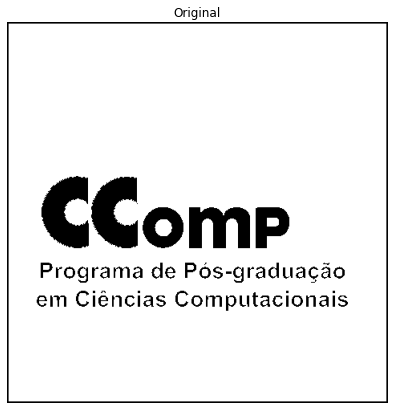

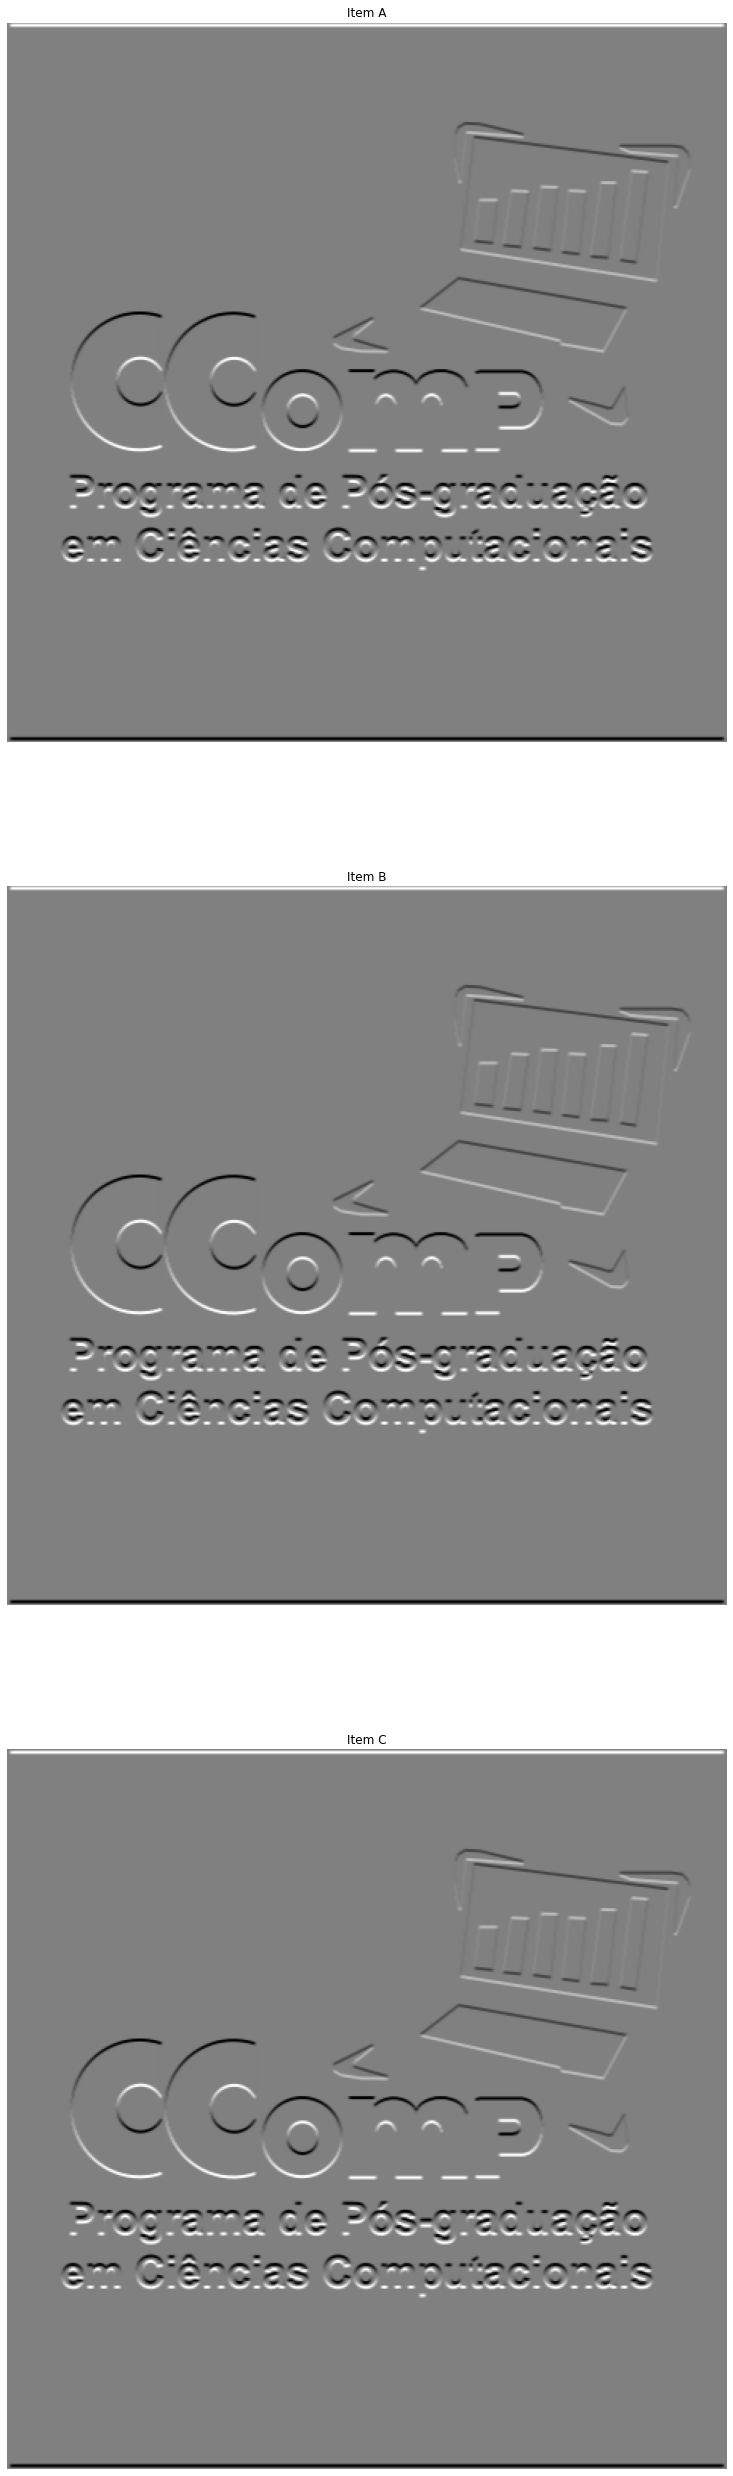

EQM da imagem do item A com item B =  0.0
EQM da imagem do item A com item C =  0.0


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

original = np.float32(cv2.imread('CCompLogo1.png',0))
#Gx = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
#ItemA = cv2.filter2D(original,-1, Gx)
#ItemC = ItemB = ItemA

Gx = np.float32(np.array([[-1,-2,-1], [0,0,0], [1,2,1]]))
Gxv = np.float32(np.array([[0,-1, 0],[0, 0, 0],[0,1,0]]))
Gxh = np.float32(np.array([[0, 0,0 ],[1,2,1], [0,0,0]]))

ItemA = cv2.filter2D(original,-1, Gx)
B = cv2.filter2D(original,-1, Gxv)
ItemB = cv2.filter2D(B,-1, Gxh)
C = cv2.filter2D(original,-1, Gxh)
ItemC = cv2.filter2D(C,-1, Gxv)

#verificando imagem original para comparação visual
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.title('Original')
plt.axis('off')
#garante que a imagem mostrada saia com as cores reais de origem, seja uma escala de várias cores ou uma escala de cinza
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize = (15,45))

plt.subplot(3,1,1)
plt.title('Item A')
plt.axis('off')
plt.imshow(ItemA, cmap = 'gray')

plt.subplot(3,1,2)
plt.title('Item B')
plt.axis('off')
plt.imshow(ItemB, cmap = 'gray')

plt.subplot(3,1,3)
plt.title('Item C')
plt.axis('off')
plt.imshow(ItemC, cmap = 'gray')
plt.show()

#fonte: https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.size)

	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

mqe = mse(ItemA,ItemB)
print ('EQM da imagem do item A com item B = ', mqe)

mqe = mse(ItemA,ItemC)
print ('EQM da imagem do item A com item C = ', mqe)



# Discussão dos resultados
Para entender este exercício devemos saber como funciona uma convolução. Para se ter um processo de convolução é preciso três componentes:


*   Imagem de entrada;
*   Matriz que  será aplicada o filtro;
*   Imagem de saída (armazena as alterações realizadas na imagem de entrada pela matriz, pixel à pixel).

A convolução é obtida pelas seguintes etapas:


1.   Selecionamos um pixel de corrdenadas (x,y) da imagem de entrada;
2.   Posicionamos a matriz que usaremos como filtro (ou kernel) de forma que seu centro coincida com o pixel selecionado;
3.   Pegamos a multiplicação por elementos da região correspondente na imagem de entrada referente ao kernel com os própios elementos do kernel, daí somamos os valores destas multiplicações e um único valor.
4.   O valor achado é então armazenado nas coordernadas equivalentes (x,y) do pixel selecionado inicialmente na imagem de saída.

Ao fazer esse processo em todos os pixels da imagem de entrada se gera uma imagem de saída que é o resultado da convolução.

A convolução como toda operação matemática tem sua própria notação, e tem propriedades as quais se comporta. *Associatividade* em particular deve ser vista para este exercício, ela permite que a convolução seja dividida em convoluções sucessivas que são melhores para o processamento na parte computacional. Pela associatividade temos que:
$$f*Gx=f*Gxv*Gxh$$

onde:

$f$ é a imagem de entrada;

$Gx$ é um filtro (ou matriz de kernel);

$Gxv*Gxh$ são concoluções em sequencia que representam $Gx$.

Outra propriedade importante é de comutatividade, onde se afirma que:
$$f*Gx=Gx*f$$
Isso implica que neste exercício não devem ser encontradas diferenças entre os resultados dos itens A, B e C.

Um detalhe a ser mencionado é o posicionamento dos valores descritos na matriz pois o filtro destas define se o mesmo é de passa alta ou de passa baixa, tendo direções diferentes com resultados qualitativos distintos.

$ A=\begin{vmatrix}
0 & 0 & 0\\
-1 & 0 & 1 \\
0 & 0 & 0
\end{vmatrix}$

$ B=\begin{vmatrix}
0 & 1 & 0\\
0 & 0 & 0 \\
0 & -1 & 0
\end{vmatrix}$

Enquanto ambas matrizes representam filtros de de passa alta (por ter valores positivos e negativos), a matriz A afeta as bordas verticais, enquanto a matriz B afeta as bordas horizontais. Apesar de ser importante, tal distinção não é visível neste exercício devido a propriedade de comutatividade e o filtro apresentado. Contudo, esses são conceitos que devem ser conhecidos pois se o filtro for de passa alta ou baixa teremos um filtro que realça ou atenua a tudo que é homogêneo, independentemente da amplitude do pixel ser alta ou baixa, ou seja, se for homogêneo será eliminado.


As imagens resultantes dos itens A, B e C são iguais, o que corrobora os conceitos apresentados de associatividade e comutatividade pois apesar da imagems sofrerem convolução de matrizes em ordem distintas, $Gx$ é igual à $Gxv*Gxh$ que também é igual à $Gxh*Gxv$. Este fato também é apoiado quantitativamente ao calcular o EQM entre essas imagens, pois ao se obter como resultado o valor 0.0 comprovamos que todas as imagens são iguais. Devido também aos filtros serem de passa alta, tudo que era homogêneo foi eliminado (como previsto), assim temos imagens normalizadas onde pixels de valores negativos ficam na cor preta, pixels de valor zero são apresentados em cinza, e os pixels restantes (de valor 255) ficam brancos. Por fim, as características distintas visulamente das imagens produzidas devido a esse 'contraste' entre cores da normalização são as bordas dos objetos da imagem original que se tornam bem destacadas, ainda que de forma suave, logo, apresentando imagem condizentes com o processo de convolução para o filtro $Gx$ (e seus semelhantes).
